In [1]:
# Importing all the required Libraries
import os
import pandas as pd
import numpy as np

# Data Visualization libraries
from pandas.plotting import scatter_matrix
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

# Evaluation Metrics
import evaluation

# Deep learning models libraries
import tensorflow as tf
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, GRU, Dropout, Dense, Input, Flatten, Conv2D, MaxPooling2D, SimpleRNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [2]:
# Loading the train and test datasets with labels
train_data = pd.read_csv("proData/train_data.csv")
test_data = pd.read_csv("proData/test_data.csv")
train_labels = pd.read_csv("proData/train_labels.csv")
test_labels = pd.read_csv("proData/test_labels.csv")

In [3]:
# Selecting the best features from the saved dataframes [Total 12]
Features = ["htn", "dm", "bgr", "appet", "bu", "sg", "pcv", "hemo", "pe", "sod", "bp", "pc"]

### Machine Learning Models

In [4]:
ml_names = ['lr', 'nb', 'dt', 'svm', 'knn']
lml_names = ['LR', 'NB', 'DT', 'SVM', 'KNN']

cml_names = ['blue', 'deeppink', 'crimson', 'aqua', 'gold']

In [5]:
# Fit logistic regression model
model_lr = LogisticRegression(
    solver='lbfgs',
    max_iter=1000,
    C=1.0,
    penalty='l2',
    random_state=42,
    class_weight='balanced'
)
model_lr.fit(train_data[Features], train_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [6]:
# Fit Gaussian Naive Bayes model
model_nb = GaussianNB(
    priors=None,
    var_smoothing=1e-9
)
model_nb.fit(train_data[Features], train_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [7]:
# Fit Decision Tree model
model_dt = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    max_features='sqrt',
    class_weight='balanced',
    criterion='gini'
)
model_dt.fit(train_data[Features], train_labels)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       max_features='sqrt', min_samples_leaf=10,
                       min_samples_split=20, random_state=42)

In [8]:
# Fit Support Vector Machine Classifier (SVM) model
model_svm = SVC(
    kernel='linear',
    C=1,
    random_state=42,
    probability=True,
    class_weight='balanced',
    max_iter=1000
)
model_svm.fit(train_data[Features], train_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, class_weight='balanced', kernel='linear', max_iter=1000,
    probability=True, random_state=42)

In [9]:
# Fit K-Nearest Neighbors model
model_knn = KNeighborsClassifier(
    n_neighbors=10,
    weights='distance',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None
)
model_knn.fit(train_data[Features], train_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10, weights='distance')

#### Machine Learning models evaluation

In [10]:
ml_models = {
    'lr': model_lr,
    'nb': model_nb,
    'dt': model_dt,
    'svm': model_svm,
    'knn': model_knn
}

In [11]:
output_dir = 'models'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

Confusion matrix of the model LR:
[[29  0]
 [ 3 48]]
True Negative of the model LR -> 29
False Positive of the model LR -> 0
False Negative of the model LR -> 3
True Positive of the model LR -> 48
Accuracy of the model LR -> 0.9625
Misclassification rate of the model LR -> 0.03749999999999998
Precision of the model LR -> 1.0
Recall of the model LR -> 0.9411764705882353
F1 Measure of the model LR -> 0.9696969696969697
Specificity of the model LR -> 1.0
MCC of the model LR -> 0.9235481451827989
AUC of the model LR -> 1.0
Precision-Recall AUC of the model LR -> 1.0




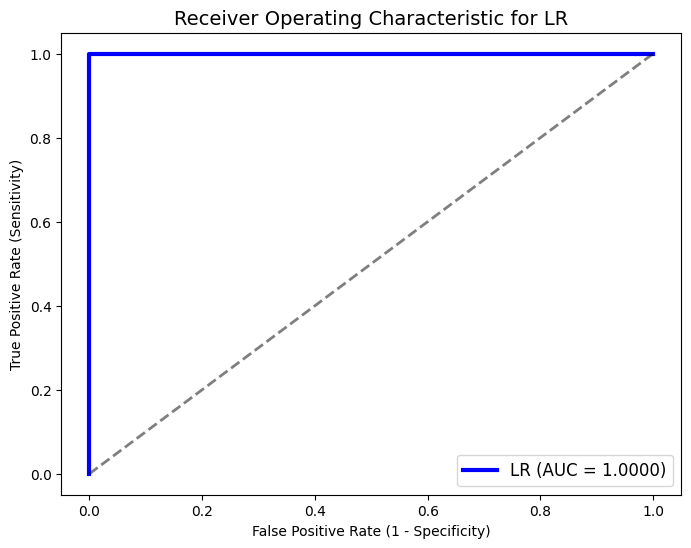

Confusion matrix of the model NB:
[[29  0]
 [11 40]]
True Negative of the model NB -> 29
False Positive of the model NB -> 0
False Negative of the model NB -> 11
True Positive of the model NB -> 40
Accuracy of the model NB -> 0.8625
Misclassification rate of the model NB -> 0.13749999999999996
Precision of the model NB -> 1.0
Recall of the model NB -> 0.7843137254901961
F1 Measure of the model NB -> 0.8791208791208791
Specificity of the model NB -> 1.0
MCC of the model NB -> 0.7540739028638984
AUC of the model NB -> 1.0
Precision-Recall AUC of the model NB -> 1.0




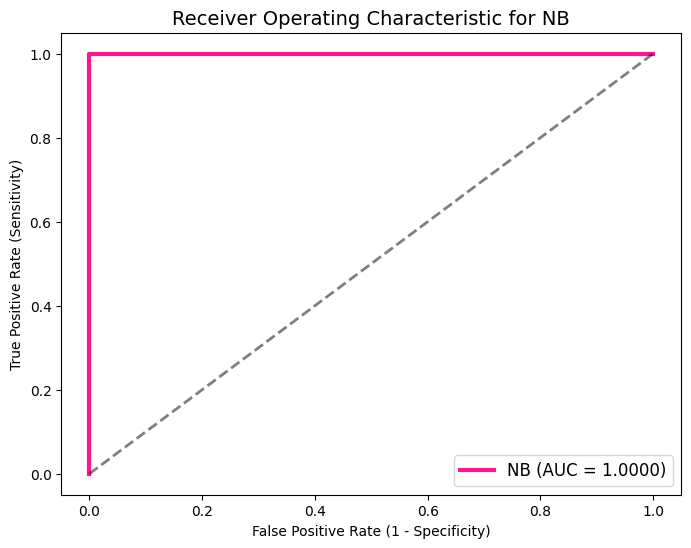

Confusion matrix of the model DT:
[[26  3]
 [ 6 45]]
True Negative of the model DT -> 26
False Positive of the model DT -> 3
False Negative of the model DT -> 6
True Positive of the model DT -> 45
Accuracy of the model DT -> 0.8875
Misclassification rate of the model DT -> 0.11250000000000004
Precision of the model DT -> 0.9375
Recall of the model DT -> 0.8823529411764706
F1 Measure of the model DT -> 0.9090909090909091
Specificity of the model DT -> 0.896551724137931
MCC of the model DT -> 0.7643157063581784
AUC of the model DT -> 0.9617985125084517
Precision-Recall AUC of the model DT -> 0.9782119056773038




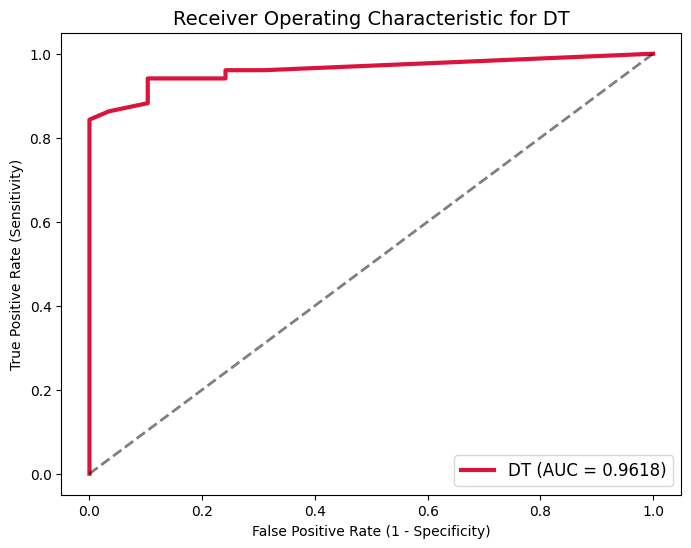

Confusion matrix of the model SVM:
[[29  0]
 [ 2 49]]
True Negative of the model SVM -> 29
False Positive of the model SVM -> 0
False Negative of the model SVM -> 2
True Positive of the model SVM -> 49
Accuracy of the model SVM -> 0.975
Misclassification rate of the model SVM -> 0.025000000000000022
Precision of the model SVM -> 1.0
Recall of the model SVM -> 0.9607843137254902
F1 Measure of the model SVM -> 0.98
Specificity of the model SVM -> 1.0
MCC of the model SVM -> 0.9480496975206558
AUC of the model SVM -> 1.0
Precision-Recall AUC of the model SVM -> 1.0




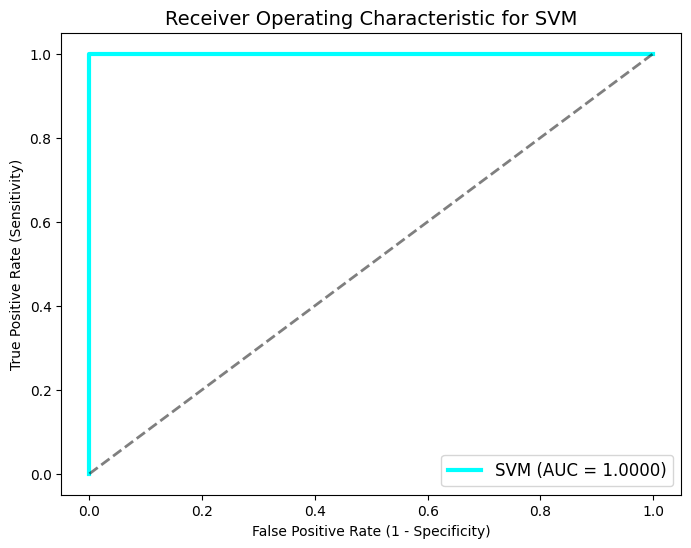

Confusion matrix of the model KNN:
[[29  0]
 [ 3 48]]
True Negative of the model KNN -> 29
False Positive of the model KNN -> 0
False Negative of the model KNN -> 3
True Positive of the model KNN -> 48
Accuracy of the model KNN -> 0.9625
Misclassification rate of the model KNN -> 0.03749999999999998
Precision of the model KNN -> 1.0
Recall of the model KNN -> 0.9411764705882353
F1 Measure of the model KNN -> 0.9696969696969697
Specificity of the model KNN -> 1.0
MCC of the model KNN -> 0.9235481451827989
AUC of the model KNN -> 1.0
Precision-Recall AUC of the model KNN -> 1.0




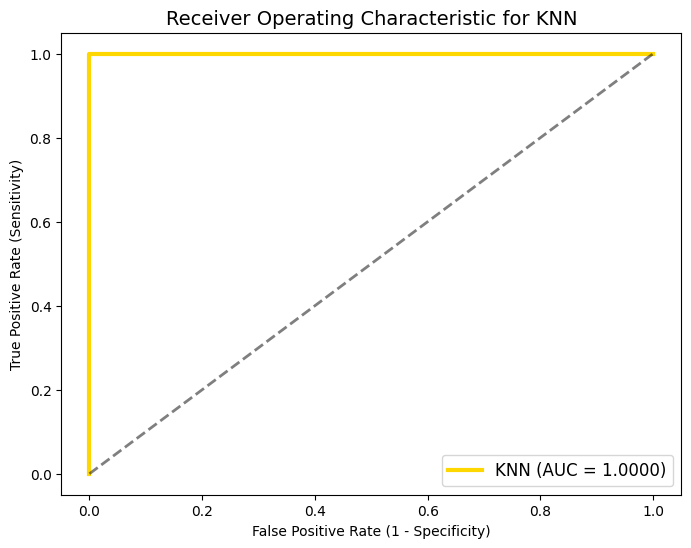

In [12]:
# Calculating the evaluation metrics on the trained machine learning models [Code in evaluation.py file]
roc_curves_data_ml = evaluation.eval_function_with_roc_plot(ml_models, ml_names, lml_names, cml_names, test_data[Features], test_labels)

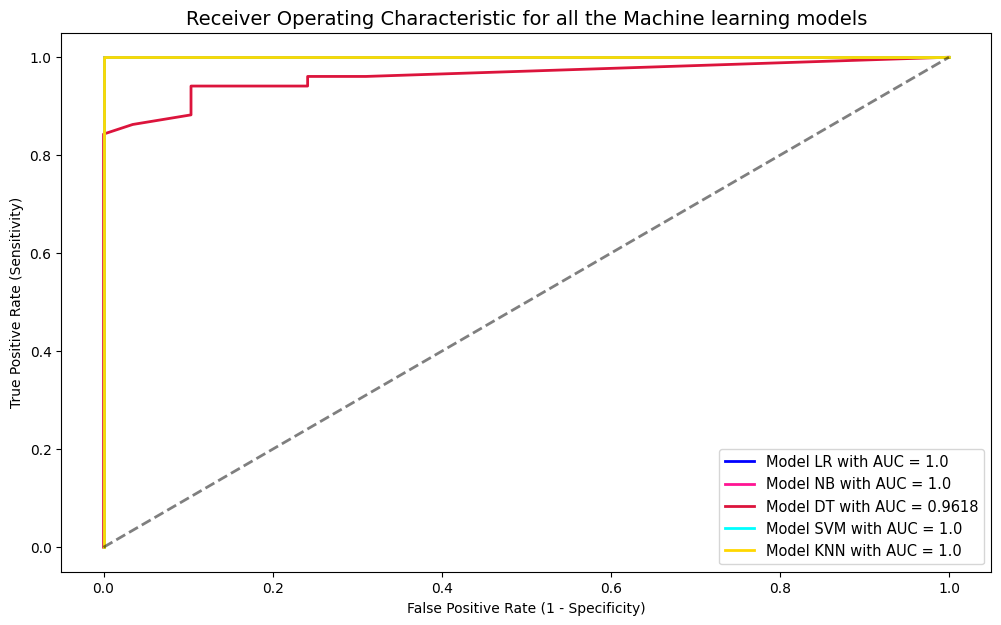

In [13]:
# Combined roc plot for the machine learning trained models
evaluation.plot_roc_curves([roc_curves_data_ml], ['Machine'])

### Ensemble Learning models

In [14]:
em_names = ['rf', 'bagging', 'xgb', 'ada', 'cb', 'gb', 'stacking', "vh", "vs", "blend"]
lem_names = ['RF', 'Bagging','XGBoost', 'Adaboost', 'Catboost', 'GradientBoost', 'Stacking', "Voting Hard", "Voting Soft", "Blending"]

cem_names = ['darkgreen', 'maroon', 'mediumblue', 'goldenrod', 'fuchsia', 'saddlebrown', 'teal', "cyan", "red", "yellow"]

# Create a list of the models to be ensembled
em_models = [('lr', model_lr), ('nb', model_nb), ('dt', model_dt), ('svm', model_svm), ('knn', model_knn)]

In [15]:
# Fit Random forest model
model_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=3,
    random_state=42,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    class_weight='balanced',
    criterion='gini'
)
model_rf.fit(train_data[Features], train_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', max_depth=3, min_samples_leaf=4,
                       min_samples_split=10, random_state=42)

In [16]:
# Aggregate the predictions made by each BaggingClassifier
y_preds = []
for name, model in em_models:
    # Create a BaggingClassifier object for the current model
    bagging_model = BaggingClassifier(model, n_estimators=10, max_samples=0.8, random_state=42)
    
    # Train the BaggingClassifier on the training set
    bagging_model.fit(train_data[Features], train_labels)

    # Make predictions on the testing set
    y_pred = bagging_model.predict_proba(test_data[Features])[:, 1]
    
    # Append the predicted probabilities to the list of predictions
    y_preds.append(y_pred)

# Aggregate the predictions using weighted voting
weights = [0.2, 0.2, 0.2, 0.2, 0.2]
model_bagging = np.average(y_preds, axis=0, weights=weights)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\ensemble\_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\ensemble\_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\ensemble\_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\ensemble\_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

In [17]:
# Fit XGboost model
model_xgb = xgb.XGBClassifier(
    n_estimators=100, 
    learning_rate=0.01,
    max_depth=3,
    alpha=1,
    lambda_=1,
    random_state=42
)
model_xgb.fit(train_data[Features], train_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\xgboost\core.py:158: UserWarning: [18:28:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "lambda_" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(alpha=1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda_=1, learning_rate=0.01,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, ...)

In [18]:
# Create an AdaBoost classifier with 50 estimators
base_estimator = DecisionTreeClassifier(max_depth=5)

model_ada = AdaBoostClassifier(
    estimator=base_estimator, 
    n_estimators=50, 
    learning_rate=0.5, 
    random_state=42
)

# Fit the AdaBoost classifier to the training data
model_ada.fit(train_data[Features], train_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.5, random_state=42)

In [19]:
# Create an instance of the CatBoostClassifier
model_cb = CatBoostClassifier(
    iterations=100, 
    learning_rate=0.01, 
    depth=6, 
    l2_leaf_reg=10,
    random_state=42,
    verbose=0
)

# Fit the model on the training data
model_cb.fit(train_data[Features], train_labels)

In [20]:
# Create a Gradient Boosting Classifier object
model_gb = GradientBoostingClassifier(
    n_estimators=100, 
    learning_rate=0.01, 
    max_depth=3, 
    min_samples_split=10, 
    min_samples_leaf=5, 
    subsample=0.8, 
    random_state=42
)

# Train the Gradient Boosting Classifier on the training set
model_gb.fit(train_data[Features], train_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.01, min_samples_leaf=5,
                           min_samples_split=10, random_state=42,
                           subsample=0.8)

In [21]:
# Creating a Stacking Classifier object
model_stacking = StackingClassifier(
    estimators=em_models,
    final_estimator=LogisticRegression(
        solver='lbfgs',
        C=1.0,
        penalty='l2',
        random_state=42
    ),
    cv=5,
    passthrough=True,
    stack_method='auto',
    n_jobs=-1
)

# Fit the stacking model on the training data
model_stacking.fit(train_data[Features], train_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


StackingClassifier(cv=5,
                   estimators=[('lr',
                                LogisticRegression(class_weight='balanced',
                                                   max_iter=1000,
                                                   random_state=42)),
                               ('nb', GaussianNB()),
                               ('dt',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       max_depth=10,
                                                       max_features='sqrt',
                                                       min_samples_leaf=10,
                                                       min_samples_split=20,
                                                       random_state=42)),
                               ('svm',
                                SVC(C=1, class_weight='balanced',
                                    kernel='linear', max_iter=1000,
                                    probability=True, random_state=42)),
                               ('knn',
                                KNeighborsClassifier(n_neighbors=10,
                                                     weights='distance'))],
                   final_estimator=LogisticRegression(random_state=42),
                   n_jobs=-1, passthrough=True)

In [22]:
# Define the voting classifier with hard voting
model_vh = VotingClassifier(
    estimators=em_models,
    voting='hard',
    weights=None,
    n_jobs=-1
)

# Fit the models on the training data
model_vh.fit(train_data[Features], train_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(class_weight='balanced',
                                                 max_iter=1000,
                                                 random_state=42)),
                             ('nb', GaussianNB()),
                             ('dt',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     max_depth=10,
                                                     max_features='sqrt',
                                                     min_samples_leaf=10,
                                                     min_samples_split=20,
                                                     random_state=42)),
                             ('svm',
                              SVC(C=1, class_weight='balanced', kernel='linear',
                                  max_iter=1000, probability=True,
                                  random_state=42)),
                             ('knn',
                              KNeighborsClassifier(n_neighbors=10,
                                                   weights='distance'))],
                 n_jobs=-1)

In [23]:
# Define the voting classifier with soft voting
model_vs = VotingClassifier(
    estimators=em_models,
    voting='soft',
    weights=None,
    n_jobs=-1
)

# Fit the models on the training data
model_vs.fit(train_data[Features], train_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(class_weight='balanced',
                                                 max_iter=1000,
                                                 random_state=42)),
                             ('nb', GaussianNB()),
                             ('dt',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     max_depth=10,
                                                     max_features='sqrt',
                                                     min_samples_leaf=10,
                                                     min_samples_split=20,
                                                     random_state=42)),
                             ('svm',
                              SVC(C=1, class_weight='balanced', kernel='linear',
                                  max_iter=1000, probability=True,
                                  random_state=42)),
                             ('knn',
                              KNeighborsClassifier(n_neighbors=10,
                                                   weights='distance'))],
                 n_jobs=-1, voting='soft')

In [24]:
# Splitting the train data into train and val set
train_set, val_set, train_set_labels, val_set_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=0)

In [25]:
base_predictions = []
meta_predictions = []

for name, model in em_models:
    model.fit(train_set[Features], train_set_labels)
    base_prediction = model.predict(val_set[Features])
    meta_prediction = model.predict(test_data[Features])
    
    base_prediction = base_prediction.reshape(len(base_prediction), 1)
    meta_prediction = meta_prediction.reshape(len(meta_prediction), 1)
    
    base_predictions.append(base_prediction)
    meta_predictions.append(meta_prediction)

base_predictions = np.hstack(base_predictions)
meta_predictions = np.hstack(meta_predictions)

model_blend = LogisticRegression()
model_blend.fit(base_predictions, val_set_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

LogisticRegression()

#### Ensemble Learning models evaluation

In [26]:
# Creating dictionaries for the trained models
em_models = {
    'rf': model_rf,
    'bagging': model_bagging,
    'xgb': model_xgb,
    'ada': model_ada,
    'cb': model_cb,
    'gb': model_gb,
    'stacking': model_stacking,
    'vh': model_vh,
    'vs': model_vs,
    'blend': model_blend
}

In [27]:
output_dir = 'models'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

Confusion matrix of the model RF:
[[29  0]
 [ 2 49]]
True Negative of the model RF -> 29
False Positive of the model RF -> 0
False Negative of the model RF -> 2
True Positive of the model RF -> 49
Accuracy of the model RF -> 0.975
Misclassification rate of the model RF -> 0.025000000000000022
Precision of the model RF -> 1.0
Recall of the model RF -> 0.9607843137254902
F1 Measure of the model RF -> 0.98
Specificity of the model RF -> 1.0
MCC of the model RF -> 0.9480496975206558
AUC of the model RF -> 1.0
Precision-Recall AUC of the model RF -> 1.0




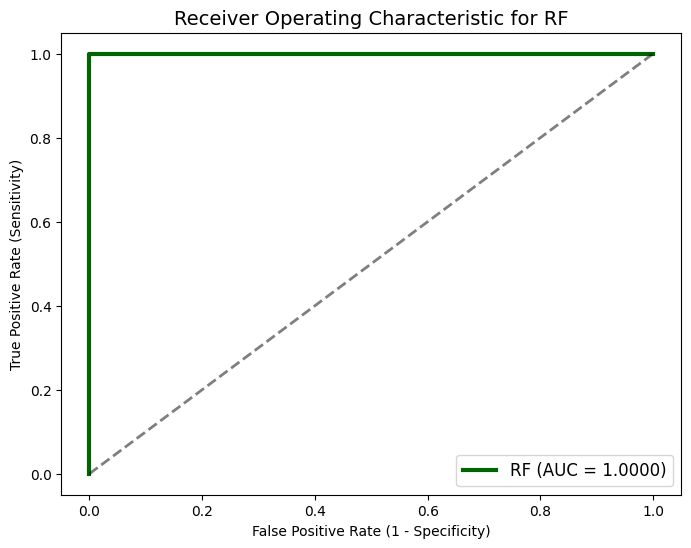

Confusion matrix of the model Bagging:
[[29  0]
 [ 3 48]]
True Negative of the model Bagging -> 29
False Positive of the model Bagging -> 0
False Negative of the model Bagging -> 3
True Positive of the model Bagging -> 48
Accuracy of the model Bagging -> 0.9625
Misclassification rate of the model Bagging -> 0.03749999999999998
Precision of the model Bagging -> 1.0
Recall of the model Bagging -> 0.9411764705882353
F1 Measure of the model Bagging -> 0.9696969696969697
Specificity of the model Bagging -> 1.0
MCC of the model Bagging -> 0.9235481451827989
AUC of the model Bagging -> 0.9705882352941176
Precision-Recall AUC of the model Bagging -> 0.9786764705882353




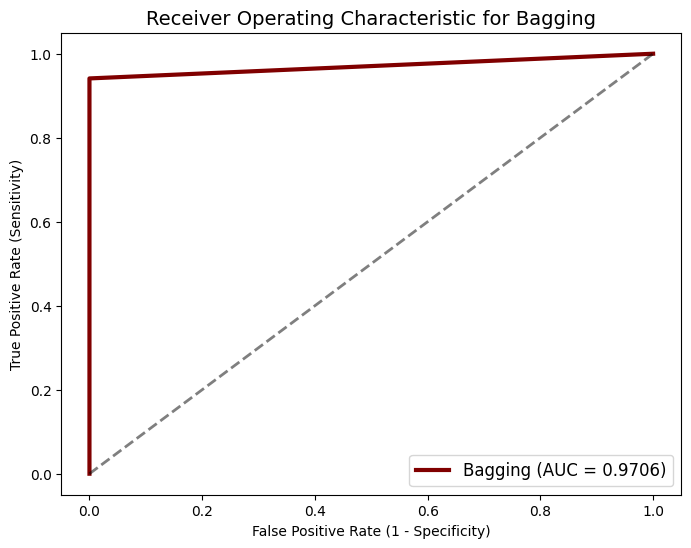

Confusion matrix of the model XGBoost:
[[28  1]
 [ 0 51]]
True Negative of the model XGBoost -> 28
False Positive of the model XGBoost -> 1
False Negative of the model XGBoost -> 0
True Positive of the model XGBoost -> 51
Accuracy of the model XGBoost -> 0.9875
Misclassification rate of the model XGBoost -> 0.012499999999999956
Precision of the model XGBoost -> 0.9807692307692307
Recall of the model XGBoost -> 1.0
F1 Measure of the model XGBoost -> 0.9902912621359223
Specificity of the model XGBoost -> 0.9655172413793104
MCC of the model XGBoost -> 0.9731133552274452
AUC of the model XGBoost -> 1.0
Precision-Recall AUC of the model XGBoost -> 1.0




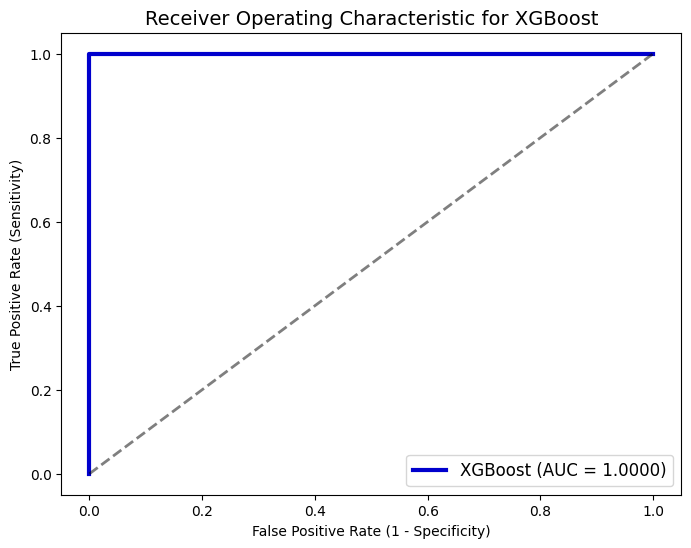

Confusion matrix of the model Adaboost:
[[28  1]
 [ 3 48]]
True Negative of the model Adaboost -> 28
False Positive of the model Adaboost -> 1
False Negative of the model Adaboost -> 3
True Positive of the model Adaboost -> 48
Accuracy of the model Adaboost -> 0.95
Misclassification rate of the model Adaboost -> 0.050000000000000044
Precision of the model Adaboost -> 0.9795918367346939
Recall of the model Adaboost -> 0.9411764705882353
F1 Measure of the model Adaboost -> 0.96
Specificity of the model Adaboost -> 0.9655172413793104
MCC of the model Adaboost -> 0.8946760340430678
AUC of the model Adaboost -> 0.9979716024340771
Precision-Recall AUC of the model Adaboost -> 0.998846301718274




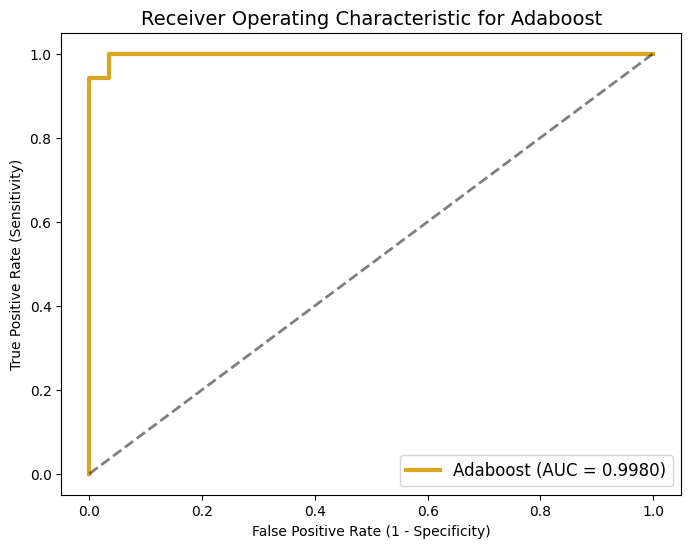

Confusion matrix of the model Catboost:
[[28  1]
 [ 3 48]]
True Negative of the model Catboost -> 28
False Positive of the model Catboost -> 1
False Negative of the model Catboost -> 3
True Positive of the model Catboost -> 48
Accuracy of the model Catboost -> 0.95
Misclassification rate of the model Catboost -> 0.050000000000000044
Precision of the model Catboost -> 0.9795918367346939
Recall of the model Catboost -> 0.9411764705882353
F1 Measure of the model Catboost -> 0.96
Specificity of the model Catboost -> 0.9655172413793104
MCC of the model Catboost -> 0.8946760340430678
AUC of the model Catboost -> 0.9979716024340771
Precision-Recall AUC of the model Catboost -> 0.998846301718274




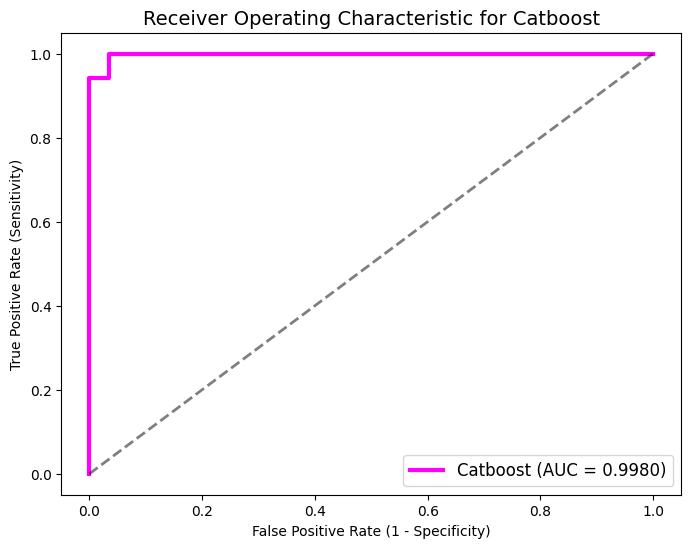

Confusion matrix of the model GradientBoost:
[[28  1]
 [ 0 51]]
True Negative of the model GradientBoost -> 28
False Positive of the model GradientBoost -> 1
False Negative of the model GradientBoost -> 0
True Positive of the model GradientBoost -> 51
Accuracy of the model GradientBoost -> 0.9875
Misclassification rate of the model GradientBoost -> 0.012499999999999956
Precision of the model GradientBoost -> 0.9807692307692307
Recall of the model GradientBoost -> 1.0
F1 Measure of the model GradientBoost -> 0.9902912621359223
Specificity of the model GradientBoost -> 0.9655172413793104
MCC of the model GradientBoost -> 0.9731133552274452
AUC of the model GradientBoost -> 1.0
Precision-Recall AUC of the model GradientBoost -> 1.0




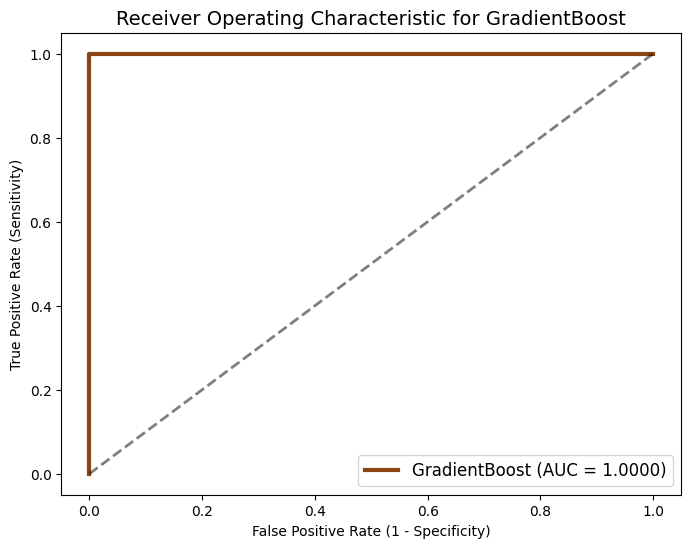

Confusion matrix of the model Stacking:
[[29  0]
 [ 2 49]]
True Negative of the model Stacking -> 29
False Positive of the model Stacking -> 0
False Negative of the model Stacking -> 2
True Positive of the model Stacking -> 49
Accuracy of the model Stacking -> 0.975
Misclassification rate of the model Stacking -> 0.025000000000000022
Precision of the model Stacking -> 1.0
Recall of the model Stacking -> 0.9607843137254902
F1 Measure of the model Stacking -> 0.98
Specificity of the model Stacking -> 1.0
MCC of the model Stacking -> 0.9480496975206558
AUC of the model Stacking -> 0.9986477349560514
Precision-Recall AUC of the model Stacking -> 0.999260081391047




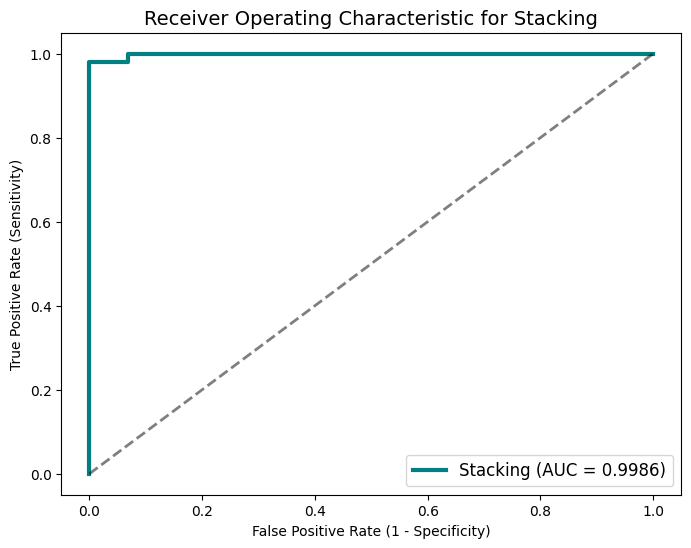

Confusion matrix of the model Voting Hard:
[[29  0]
 [ 3 48]]
True Negative of the model Voting Hard -> 29
False Positive of the model Voting Hard -> 0
False Negative of the model Voting Hard -> 3
True Positive of the model Voting Hard -> 48
Accuracy of the model Voting Hard -> 0.9625
Misclassification rate of the model Voting Hard -> 0.03749999999999998
Precision of the model Voting Hard -> 1.0
Recall of the model Voting Hard -> 0.9411764705882353
F1 Measure of the model Voting Hard -> 0.9696969696969697
Specificity of the model Voting Hard -> 1.0
MCC of the model Voting Hard -> 0.9235481451827989
AUC of the model Voting Hard -> 0.9705882352941176
Precision-Recall AUC of the model Voting Hard -> 0.9786764705882353




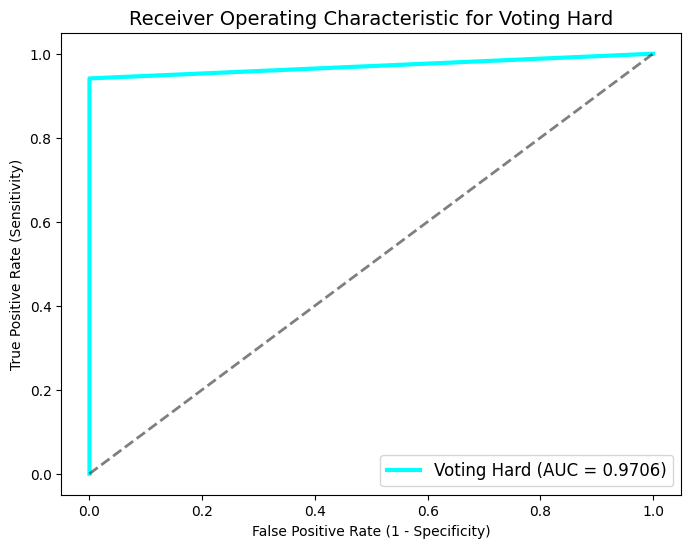

Confusion matrix of the model Voting Soft:
[[29  0]
 [ 3 48]]
True Negative of the model Voting Soft -> 29
False Positive of the model Voting Soft -> 0
False Negative of the model Voting Soft -> 3
True Positive of the model Voting Soft -> 48
Accuracy of the model Voting Soft -> 0.9625
Misclassification rate of the model Voting Soft -> 0.03749999999999998
Precision of the model Voting Soft -> 1.0
Recall of the model Voting Soft -> 0.9411764705882353
F1 Measure of the model Voting Soft -> 0.9696969696969697
Specificity of the model Voting Soft -> 1.0
MCC of the model Voting Soft -> 0.9235481451827989
AUC of the model Voting Soft -> 0.9966193373901284
Precision-Recall AUC of the model Voting Soft -> 0.9981565275682923




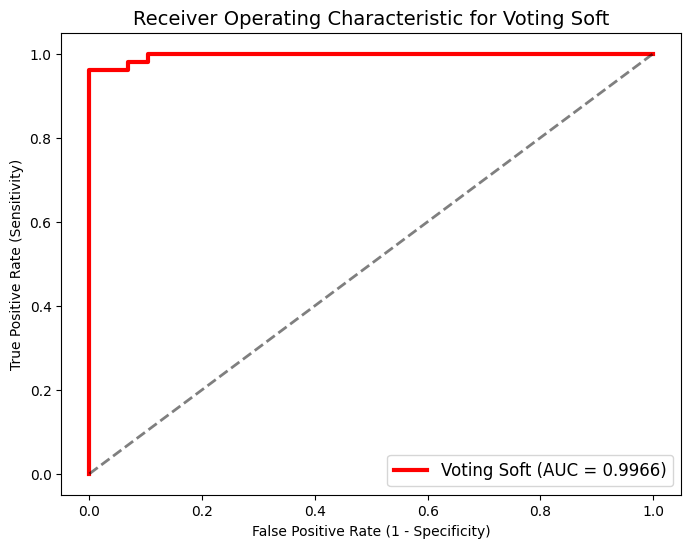

Confusion matrix of the model Blending:
[[29  0]
 [ 3 48]]
True Negative of the model Blending -> 29
False Positive of the model Blending -> 0
False Negative of the model Blending -> 3
True Positive of the model Blending -> 48
Accuracy of the model Blending -> 0.9625
Misclassification rate of the model Blending -> 0.03749999999999998
Precision of the model Blending -> 1.0
Recall of the model Blending -> 0.9411764705882353
F1 Measure of the model Blending -> 0.9696969696969697
Specificity of the model Blending -> 1.0
MCC of the model Blending -> 0.9235481451827989
AUC of the model Blending -> 0.9854631507775524
Precision-Recall AUC of the model Blending -> 0.990484176126591




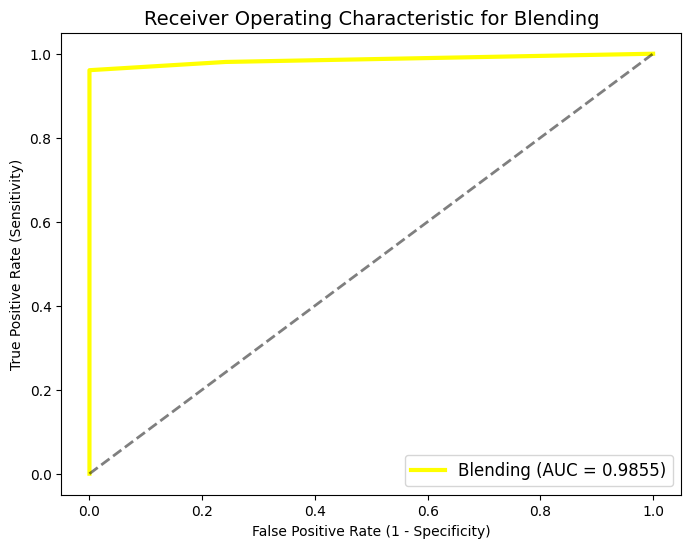

In [28]:
# Calculating the evaluation metrics on the trained ensemble learning models [Code in evaluation.py file]
roc_curves_data_em = evaluation.eval_function_with_roc_plot(em_models, em_names, lem_names, cem_names, test_data[Features], test_labels, meta_predictions, None)

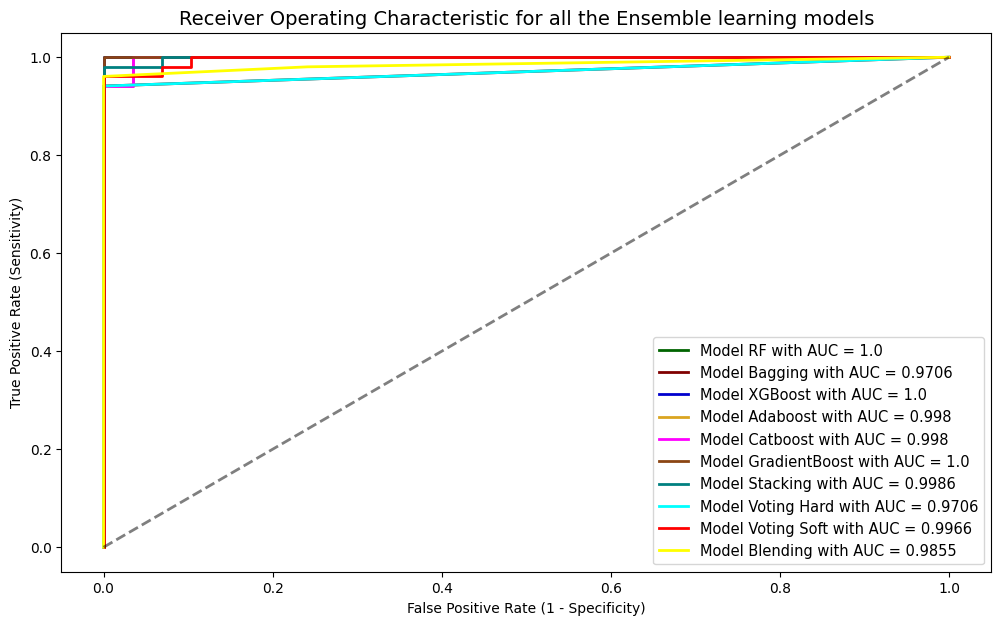

In [29]:
# Combined roc plot for the ensemble learning trained models
evaluation.plot_roc_curves([roc_curves_data_em], ["Ensemble"])

### Deep Learning Models

In [30]:
dl_names = ["ann", "mlp", "rnn", "lstm", "gru"]
ldl_names = ["ANN", "MLP", "SimpleRNN", "LSTM", "GRU"]

cdl_names = ["lime", "darkblue", "red", "chocolate", "darkorange"]

In [31]:
# Reshape the features to 2D tensor shape (batch_size, num_features)
train_features = train_data[Features].values
test_features = test_data[Features].values

In [32]:
# Define the model architecture
model_ann = Sequential()
model_ann.add(Dense(64, input_dim=train_features.shape[1], activation='relu'))
model_ann.add(Dropout(0.3))
model_ann.add(Dense(32, activation='relu'))
model_ann.add(Dropout(0.5))
model_ann.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_ann.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6
)

# Train the model
model_ann.fit(
    train_features, 
    train_labels, 
    validation_data=(test_features, test_labels), 
    epochs=100, 
    batch_size=20,
    verbose=1, 
    callbacks=[early_stopping, reduce_lr]
)

C:\Users\chand\Py_Env\ckd\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.5792 - loss: 0.6755 - val_accuracy: 0.9750 - val_loss: 0.4371 - learning_rate: 0.0010
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8457 - loss: 0.4611 - val_accuracy: 0.9750 - val_loss: 0.2834 - learning_rate: 0.0010
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9488 - loss: 0.3187 - val_accuracy: 0.9625 - val_loss: 0.1872 - learning_rate: 0.0010
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9523 - loss: 0.2156 - val_accuracy: 0.9625 - val_loss: 0.1302 - learning_rate: 0.0010
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9556 - loss: 0.1571 - val_accuracy: 0.9625 - val_loss: 0.1006 - learning_rate: 0.0010
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9683 - loss: 0.1407 - val_accuracy: 0.9625 - val_loss: 0.0868 - learning_rate: 0.0010
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9905 - loss: 0.0950 - val_ac

In [33]:
# Create an MLP classifier with two hidden layers of 50 neurons each
model_mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size=32,
    learning_rate='adaptive',
    learning_rate_init=0.001,
    max_iter=1000,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10,
    random_state=42
)
# Train the MLP classifier on the training set
model_mlp.fit(train_data[Features], train_labels)

C:\Users\chand\Py_Env\ckd\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(batch_size=32, early_stopping=True, hidden_layer_sizes=(100, 50),
              learning_rate='adaptive', max_iter=1000, random_state=42)

In [34]:
# Reshape the features to 3D tensor shape (batch_size, time_steps, num_features)
train_features = train_features.reshape(-1, 1, train_features.shape[1])
test_features = test_features.reshape(-1, 1, test_features.shape[1])

In [35]:
# Define the model architecture
model_rnn = Sequential()
model_rnn.add(SimpleRNN(128, return_sequences=True, input_shape=(train_features.shape[1], train_features.shape[2]), activation='relu'))
model_rnn.add(Dropout(0.3))
model_rnn.add(SimpleRNN(64, activation='relu'))
model_rnn.add(Dropout(0.3))
model_rnn.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_rnn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6
)

# Train the model
model_rnn.fit(
    train_features, 
    train_labels, 
    validation_data=(test_features, test_labels), 
    epochs=100, 
    batch_size=20,
    callbacks=[early_stopping, reduce_lr]
)

C:\Users\chand\Py_Env\ckd\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.7372 - loss: 0.5877 - val_accuracy: 0.9500 - val_loss: 0.3272 - learning_rate: 0.0010
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9725 - loss: 0.2629 - val_accuracy: 0.9625 - val_loss: 0.1512 - learning_rate: 0.0010
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9860 - loss: 0.1215 - val_accuracy: 0.9625 - val_loss: 0.0863 - learning_rate: 0.0010
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9815 - loss: 0.0766 - val_accuracy: 0.9750 - val_loss: 0.0567 - learning_rate: 0.0010
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9797 - loss: 0.0453 - val_accuracy: 0.9750 - val_loss: 0.0465 - learning_rate: 0.0010
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9859 - loss: 0.0434 - val_accuracy: 0.9750 - val_loss: 0.0510 - learning_rate: 0.0010
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9920 - loss: 0.0295 - val_a

In [36]:
# Define the model architecture
model_lstm = Sequential()
model_lstm.add(LSTM(128, return_sequences=True, input_shape=(train_features.shape[1], train_features.shape[2]), activation='relu'))
model_lstm.add(Dropout(0.3))
model_lstm.add(LSTM(64, activation='relu'))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_lstm.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6
)

# Train the model
model_lstm.fit(
    train_features, 
    train_labels, 
    validation_data=(test_features, test_labels), 
    epochs=100, 
    batch_size=20,
    callbacks=[early_stopping, reduce_lr]
)

C:\Users\chand\Py_Env\ckd\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.7595 - loss: 0.6865 - val_accuracy: 0.9250 - val_loss: 0.6575 - learning_rate: 0.0010
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9428 - loss: 0.6352 - val_accuracy: 0.9625 - val_loss: 0.5372 - learning_rate: 0.0010
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9599 - loss: 0.4792 - val_accuracy: 0.9625 - val_loss: 0.2745 - learning_rate: 0.0010
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9731 - loss: 0.1967 - val_accuracy: 0.9625 - val_loss: 0.1443 - learning_rate: 0.0010
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9740 - loss: 0.0959 - val_accuracy: 0.9625 - val_loss: 0.1073 - learning_rate: 0.0010
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9953 - loss: 0.0518 - val_accuracy: 0.9625 - val_loss: 0.0966 - learning_rate: 0.0010
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9806 - loss: 0.0336 - val_ac

In [37]:
# Define the model architecture
model_gru = Sequential()
model_gru.add(GRU(128, return_sequences=True, input_shape=(train_features.shape[1], train_features.shape[2]), activation='relu'))
model_gru.add(Dropout(0.3))
model_gru.add(GRU(64, activation='relu'))
model_gru.add(Dropout(0.3))
model_gru.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_gru.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6
)

# Train the model
model_gru.fit(
    train_features, 
    train_labels, 
    validation_data=(test_features, test_labels), 
    epochs=100, 
    batch_size=20,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100


C:\Users\chand\Py_Env\ckd\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.7962 - loss: 0.6657 - val_accuracy: 0.9625 - val_loss: 0.5662 - learning_rate: 0.0010
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9645 - loss: 0.5161 - val_accuracy: 0.9625 - val_loss: 0.3131 - learning_rate: 0.0010
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9632 - loss: 0.2677 - val_accuracy: 0.9625 - val_loss: 0.1300 - learning_rate: 0.0010
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9695 - loss: 0.1176 - val_accuracy: 0.9625 - val_loss: 0.0847 - learning_rate: 0.0010
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9924 - loss: 0.0436 - val_accuracy: 0.9625 - val_loss: 0.0677 - learning_rate: 0.0010
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9866 - loss: 0.0321 - val_accuracy: 0.9750 - val_loss: 0.0584 - learning_rate: 0.0010
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9840 - loss: 0.0376 - val_accuracy: 

#### Deep Learning models evaluation

In [38]:
dl_models = {
    'ann': model_ann,
    'mlp': model_mlp,
    'rnn': model_rnn,
    'lstm': model_lstm,
    'gru': model_gru
}

In [39]:
output_dir = 'models'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Confusion matrix of the model ANN:
[[29  0]
 [ 2 49]]
True Negative of the model ANN -> 29
False Positive of the model ANN -> 0
False Negative of the model ANN -> 2
True Positive of the model ANN -> 49
Accuracy of the model ANN -> 0.975
Misclassification rate of the model ANN -> 0.025000000000000022
Precision of the model ANN -> 1.0
Recall of the model ANN -> 0.9607843137254902
F1 Measure of the model ANN -> 0.98
Specificity of the model ANN -> 1.0
MCC of the model ANN -> 0.9480496975206558
AUC of the model ANN -> 0.9803921568627452
Precision-Recall AUC of the model ANN -> 0.9857843137254902




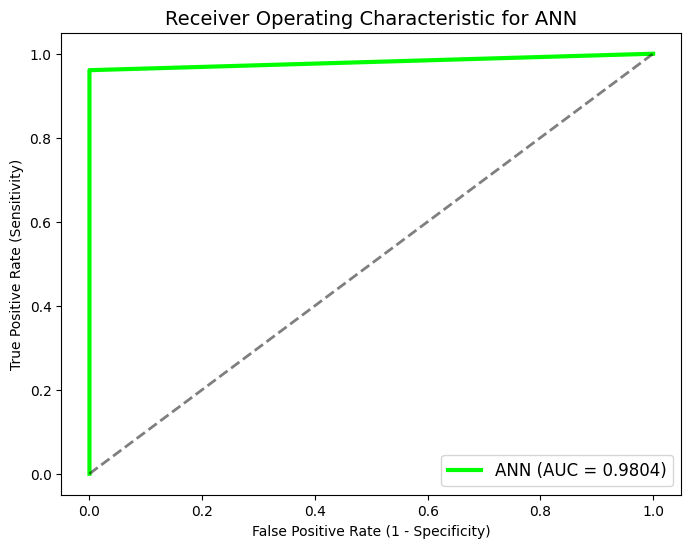

Confusion matrix of the model MLP:
[[29  0]
 [ 2 49]]
True Negative of the model MLP -> 29
False Positive of the model MLP -> 0
False Negative of the model MLP -> 2
True Positive of the model MLP -> 49
Accuracy of the model MLP -> 0.975
Misclassification rate of the model MLP -> 0.025000000000000022
Precision of the model MLP -> 1.0
Recall of the model MLP -> 0.9607843137254902
F1 Measure of the model MLP -> 0.98
Specificity of the model MLP -> 1.0
MCC of the model MLP -> 0.9480496975206558
AUC of the model MLP -> 1.0
Precision-Recall AUC of the model MLP -> 1.0




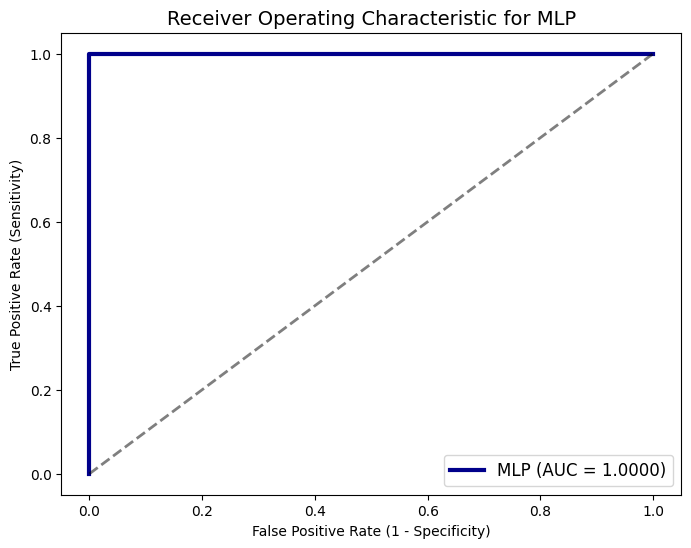

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step
Confusion matrix of the model SimpleRNN:
[[29  0]
 [ 1 50]]
True Negative of the model SimpleRNN -> 29
False Positive of the model SimpleRNN -> 0
False Negative of the model SimpleRNN -> 1
True Positive of the model SimpleRNN -> 50
Accuracy of the model SimpleRNN -> 0.9875
Misclassification rate of the model SimpleRNN -> 0.012499999999999956
Precision of the model SimpleRNN -> 1.0
Recall of the model SimpleRNN -> 0.9803921568627451
F1 Measure of the model SimpleRNN -> 0.9900990099009901
Specificity of the model SimpleRNN -> 1.0
MCC of the model SimpleRNN -> 0.973505222533836
AUC of the model SimpleRNN -> 0.9901960784313726
Precision-Recall AUC of the model SimpleRNN -> 0.9928921568627451




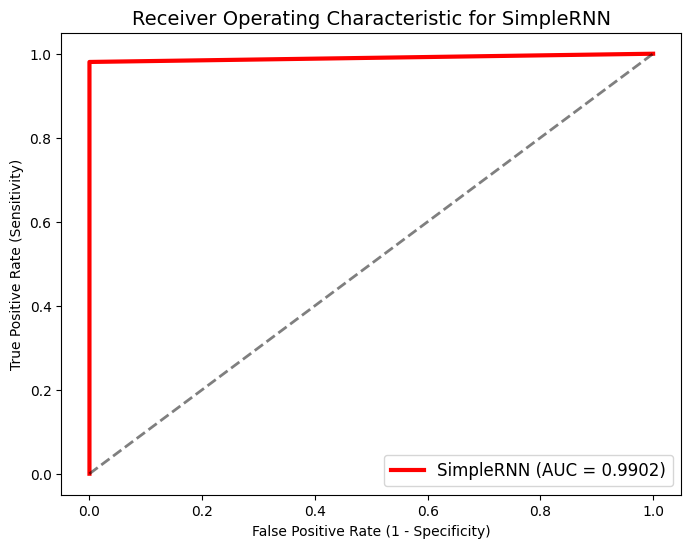

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000244D8A52A60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step
Confusion matrix of the model LSTM:
[[29  0]
 [ 2 49]]
True Negative of the model LSTM -> 29
False Positive of the model LSTM -> 0
False Negative of the model LSTM -> 2
True Positive of the model L

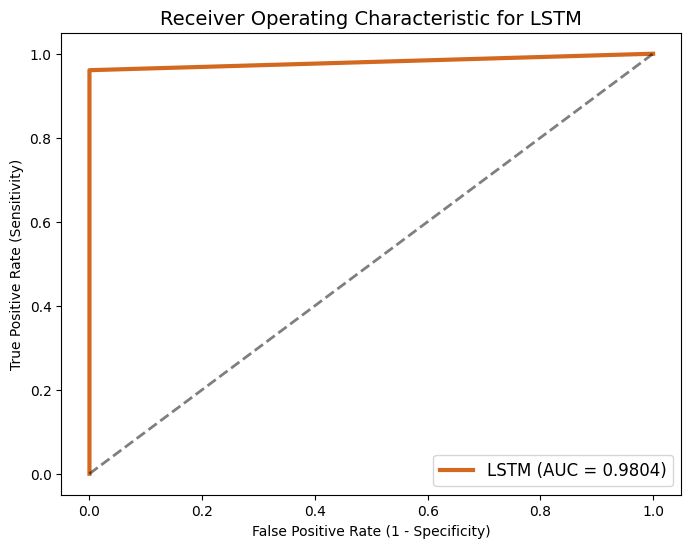

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 280ms/step
Confusion matrix of the model GRU:
[[29  0]
 [ 1 50]]
True Negative of the model GRU -> 29
False Positive of the model GRU -> 0
False Negative of the model GRU -> 1
True Positive of the model GRU -> 50
Accuracy of the model GRU -> 0.9875
Misclassification rate of the model GRU -> 0.012499999999999956
Precision of the model GRU -> 1.0
Recall of the model GRU -> 0.9803921568627451
F1 Measure of the model GRU -> 0.9900990099009901
Specificity of the model GRU -> 1.0
MCC of the model GRU -> 0.973505222533836
AUC of the model GRU -> 0.9901960784313726
Precision-Recall AUC of the model GRU -> 0.9928921568627451




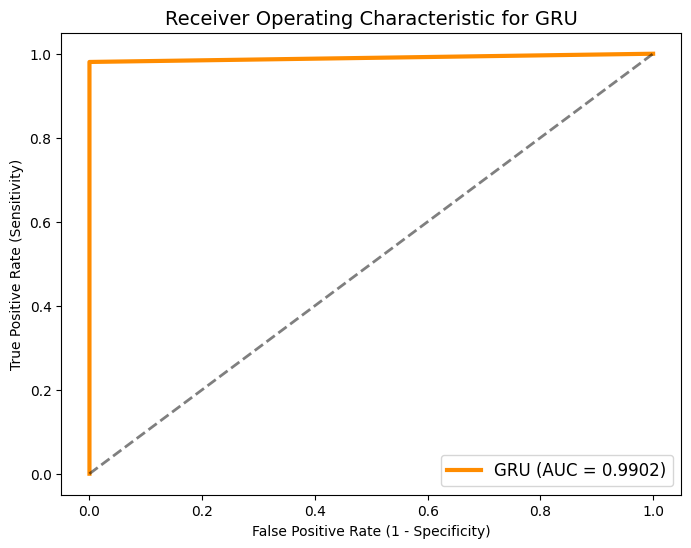

In [40]:
# Calculating the evaluation metrics on the trained deep learning models [Code in evaluation.py file]
roc_curves_data_dl = evaluation.eval_function_with_roc_plot(dl_models, dl_names, ldl_names, cdl_names, test_data[Features], test_labels, None, test_features)

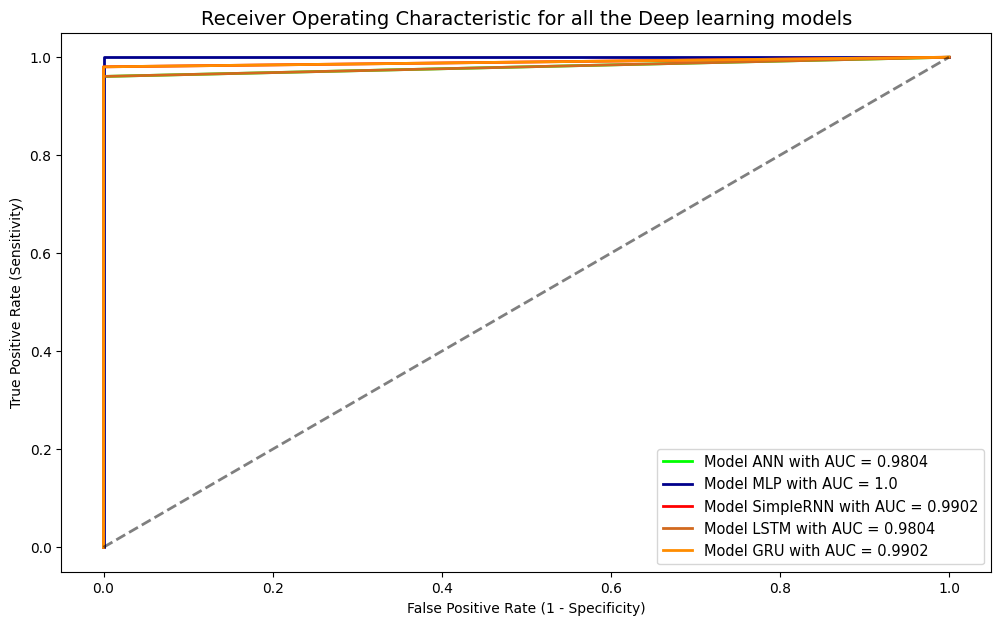

In [41]:
# Combined roc plot for the deep learning trained models
evaluation.plot_roc_curves([roc_curves_data_dl], ["Deep"])